# Data Description :

The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.


# Problem Statement :
    
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

# Importing the relevent libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Loading the Dataset

In [2]:
raw_data = pd.read_csv('vehicle.csv')

raw_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

There are 18 indipendent variables and only one dependent variable. Also, the class variable is non-numeric in nature. Rest all are numeric in nature.

In [3]:
# Checking the last 5 records of dataset

raw_data.tail(5)

compactness  circularity  distance_circularity  radius_ratio  \
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio class  
841             188.0            195   car  
842             186.0            197   van  
843             187.0            201   car  
844             190.0            195   car  
845             186.0            190   van

# 1. Data Preprocessing 



# Understanding the data, data types and data description

In [4]:
# To show the detail description
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

* It gives the information about the number of rows, number of columns, data types , memory usage, number of null values in each columns.

In [5]:
#Analyze the distribution of the dataset
raw_data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

* By analysing it, we can see that
  
  -compactness, circularity, distance_circularity, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about.2, hollows_ratio are approximately normally distributed.
    
    -radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance.1, skewness_about, skewness_about.1 are approx. right skewed distribution.

In [6]:
#Data types of columns
raw_data.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [7]:
#class attribute is not an object it is a category
raw_data['class']=raw_data['class'].astype('category')

In [8]:
#To get the shape 
raw_data.shape

(846, 19)

In [9]:
#To get the number of columns
raw_data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

# Checking for missing values

In [10]:
#Checking for missing values in the dataset
raw_data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [11]:
#replace missing variable('?') into null variable using numpy
raw_data = raw_data.replace(' ', np.nan)

# Handling the missing values

In [12]:
#Replacing the missing values by median 
for i in raw_data.columns[:17]:
    median_value = raw_data[i].median()
    raw_data[i] = raw_data[i].fillna(median_value)

 As some data are rightly skewed so we will use median to handle the missing values.

In [13]:
# again check for missing values
raw_data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [14]:
# Again check data information
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   compactness                  846 non-null    int64   
 1   circularity                  846 non-null    float64 
 2   distance_circularity         846 non-null    float64 
 3   radius_ratio                 846 non-null    float64 
 4   pr.axis_aspect_ratio         846 non-null    float64 
 5   max.length_aspect_ratio      846 non-null    int64   
 6   scatter_ratio                846 non-null    float64 
 7   elongatedness                846 non-null    float64 
 8   pr.axis_rectangularity       846 non-null    float64 
 9   max.length_rectangularity    846 non-null    int64   
 10  scaled_variance              846 non-null    float64 
 11  scaled_variance.1            846 non-null    float64 
 12  scaled_radius_of_gyration    846 non-null    float64 
 13  scale

No missing values are present in the dataset now.

# Understanding the outliers using Boxplots

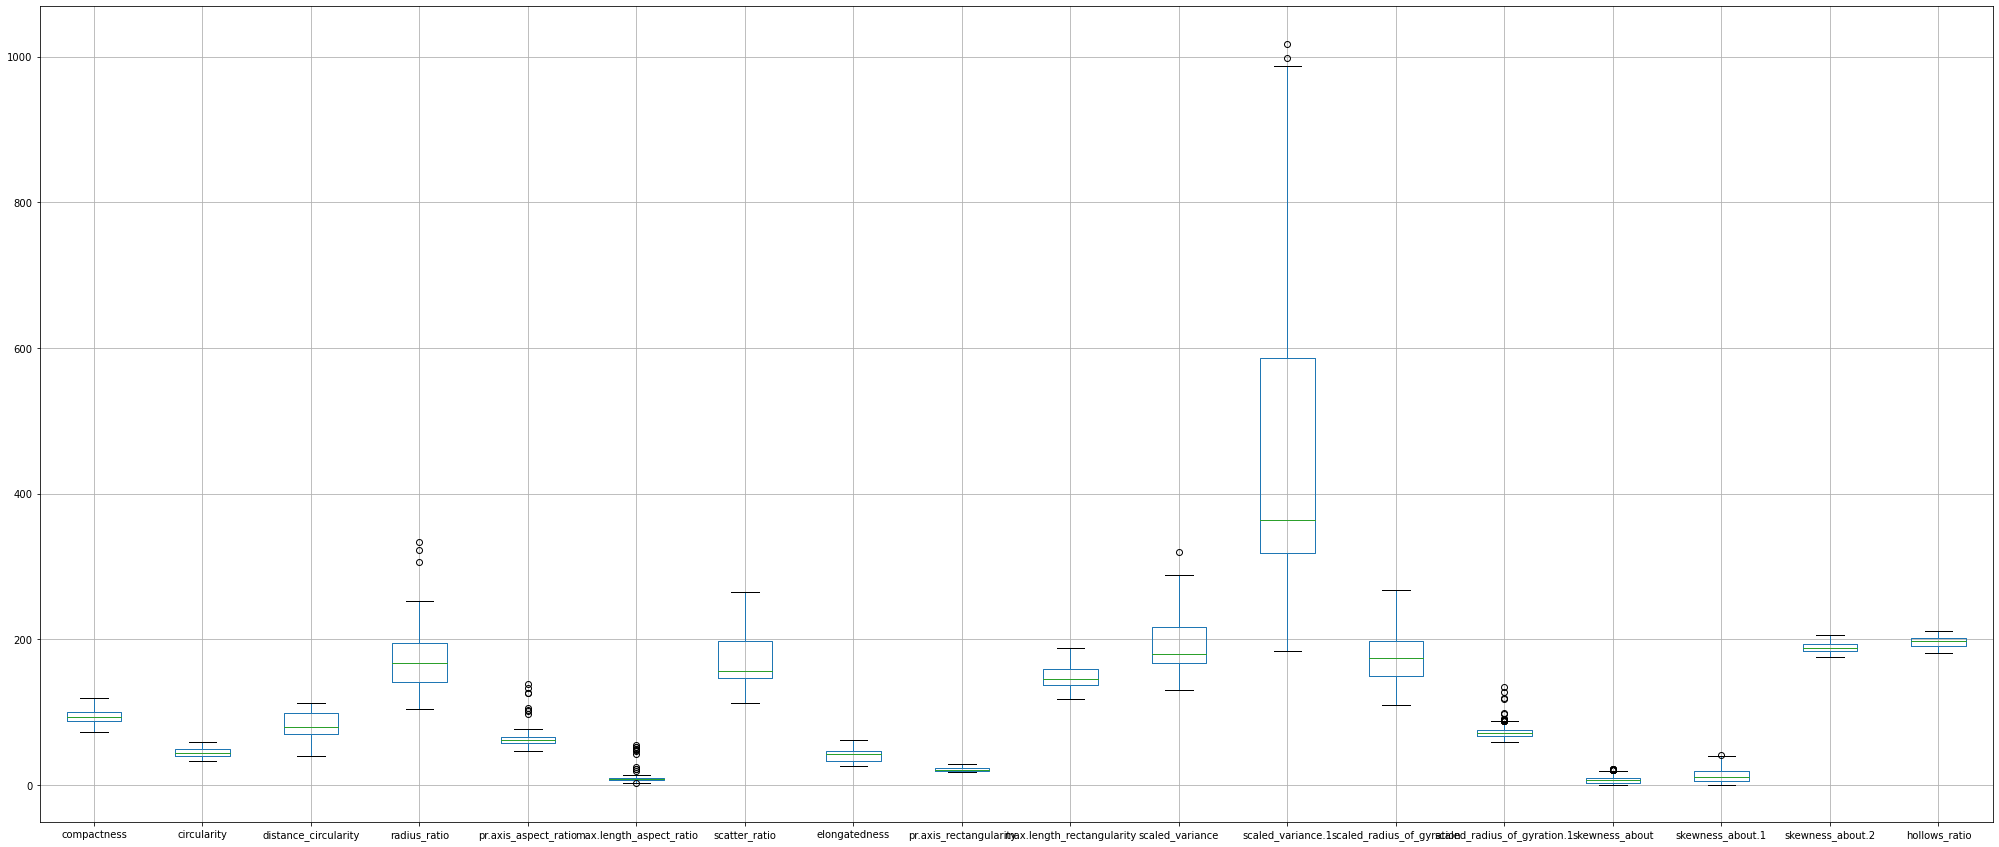

In [15]:
# Understand the spread and outliers in dataset using boxplot
raw_data.boxplot(figsize=(35,15))

There are some columns which contains outliers such as radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, skewness_about, skewness_about.1.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009655271400>,
      dtype=object)

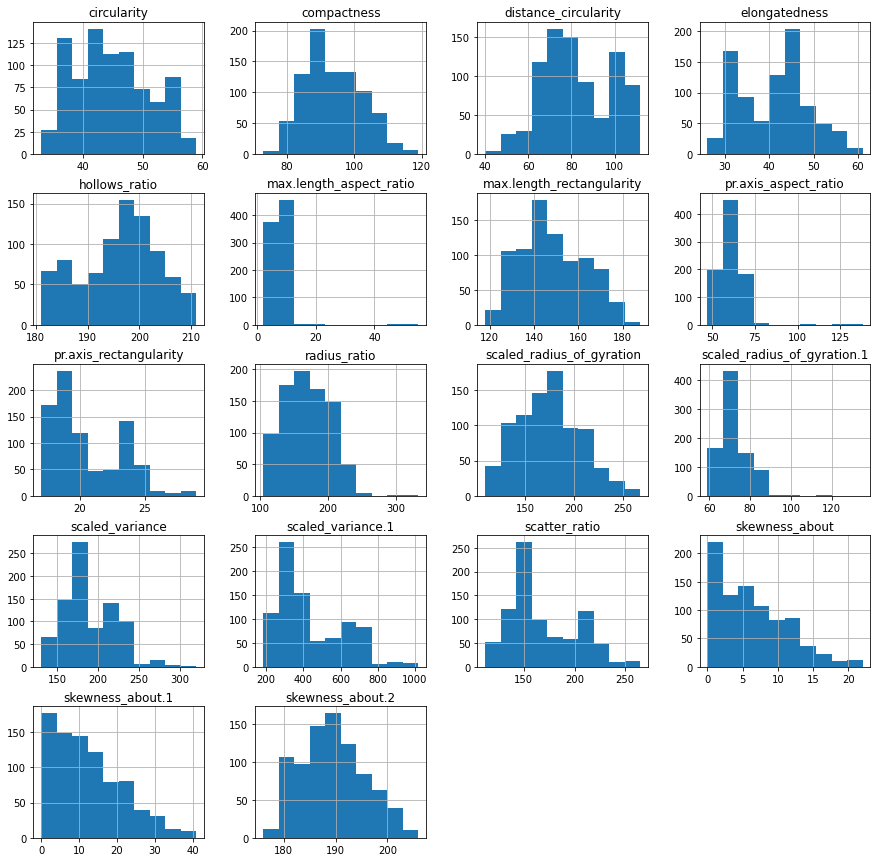

In [16]:
# Histogram 
raw_data.hist(figsize=(15,15))

This histogram is also displaying the attributes.

# Handling the outliers

In [17]:
#find the outliers and replace them by median
for col_name in raw_data.columns[:-1]:
    q1 = raw_data[col_name].quantile(0.25)
    q3 = raw_data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    raw_data.loc[(raw_data[col_name] < low) | (raw_data[col_name] > high), col_name] = raw_data[col_name].median()

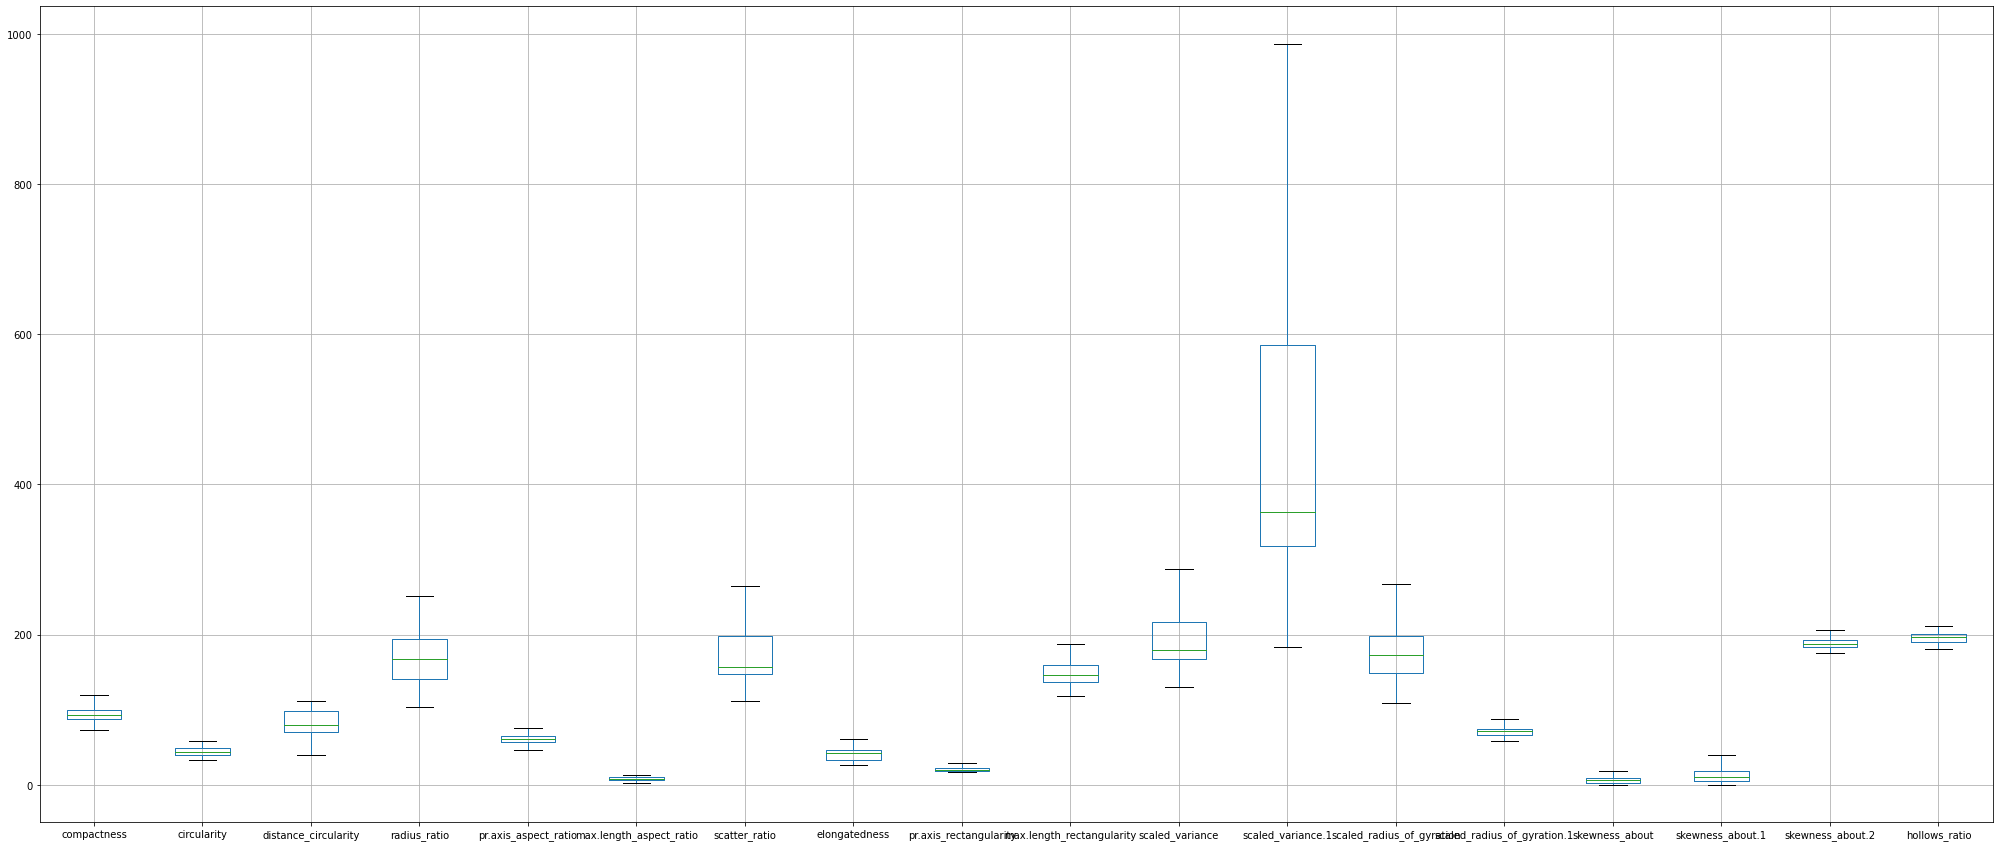

In [18]:
# again check for outliers in dataset using boxplot
raw_data.boxplot(figsize=(35,15))

Now, no outliers are present in the dataset. They've been dealt successfully with.

# 2. Understanding the attributes

### Dependent Attribute : Class

In [19]:
raw_data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

### Univariate Analysis

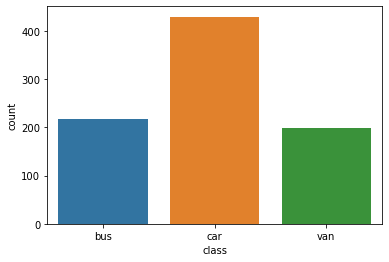

In [20]:
sns.countplot(raw_data['class'])

### Encoding the dependent attribute

In [21]:
#Encoding of categorical variables
labelencoder_X=LabelEncoder()
raw_data['class']=labelencoder_X.fit_transform(raw_data['class'])

###  Independent Attributes

### Multivariate Analysis

In [22]:
#correlation matrix
cor=raw_data.corr()
cor

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925     0.638280              0.794222   
pr.axis_aspect_ratio            0.192864     0.203253              0.244332   
max.length_aspect_ratio         0.499928     0.560470              0.666809   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance.1               0.806170     0.827462              0.883943   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.246681     0.068745             -0.229353   
skewness_about                  0.197308     0.136351              0.099107   
skewness_about.1                0.156348    -0.009666              0.262345   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721925              0.192864   
circularity                      0.638280              0.203253   
distance_circularity             0.794222              0.244332   
radius_ratio                     1.000000              0.650554   
pr.axis_aspect_ratio             0.650554              1.000000   
max.length_aspect_ratio          0.463958              0.150295   
scatter_ratio                    0.769941              0.194195   
elongatedness                   -0.825392             -0.298144   
pr.axis_rectangularity           0.744139              0.163047   
max.length_rectangularity        0.579468              0.147592   
scaled_variance                  0.786183              0.207101   
scaled_variance.1                0.760257              0.196401   
scaled_radius_of_gyration        0.550774              0.148591   
scaled_radius_of_gyration.1     -0.390459             -0.321070   
skewness_about                   0.035755             -0.056030   
skewness_about.1                 0.179601             -0.021088   
skewness_about.2                 0.405849              0.400882   
hollows_ratio                    0.491758              0.415734   
class                           -0.213948             -0.209298   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812620   
circularity                                 0.560470       0.847938   
distance_circularity                        0.666809       0.905076   
radius_ratio                                0.463958       0.769941   
pr.axis_aspect_ratio                        0.150295       0.194195   
max.length_aspect_ratio                     1.000000       0.490759   
scatter_ratio                               0.490759       1.000000   
elongatedness                              -0.504181      -0.971601   
pr.axis_rectangularity                      0.487931       0.989751   
max.length_rectangularity                   0.642713       0.809083   
scaled_variance                             0.401391       0.960883   
scaled_variance.1                           0.463249       0.980447   
scaled_radius_of_gyration                   0.397397       0.799875   
scaled_radius_of_gyration.1                -0.335444       0.011314   
skewness_about                            

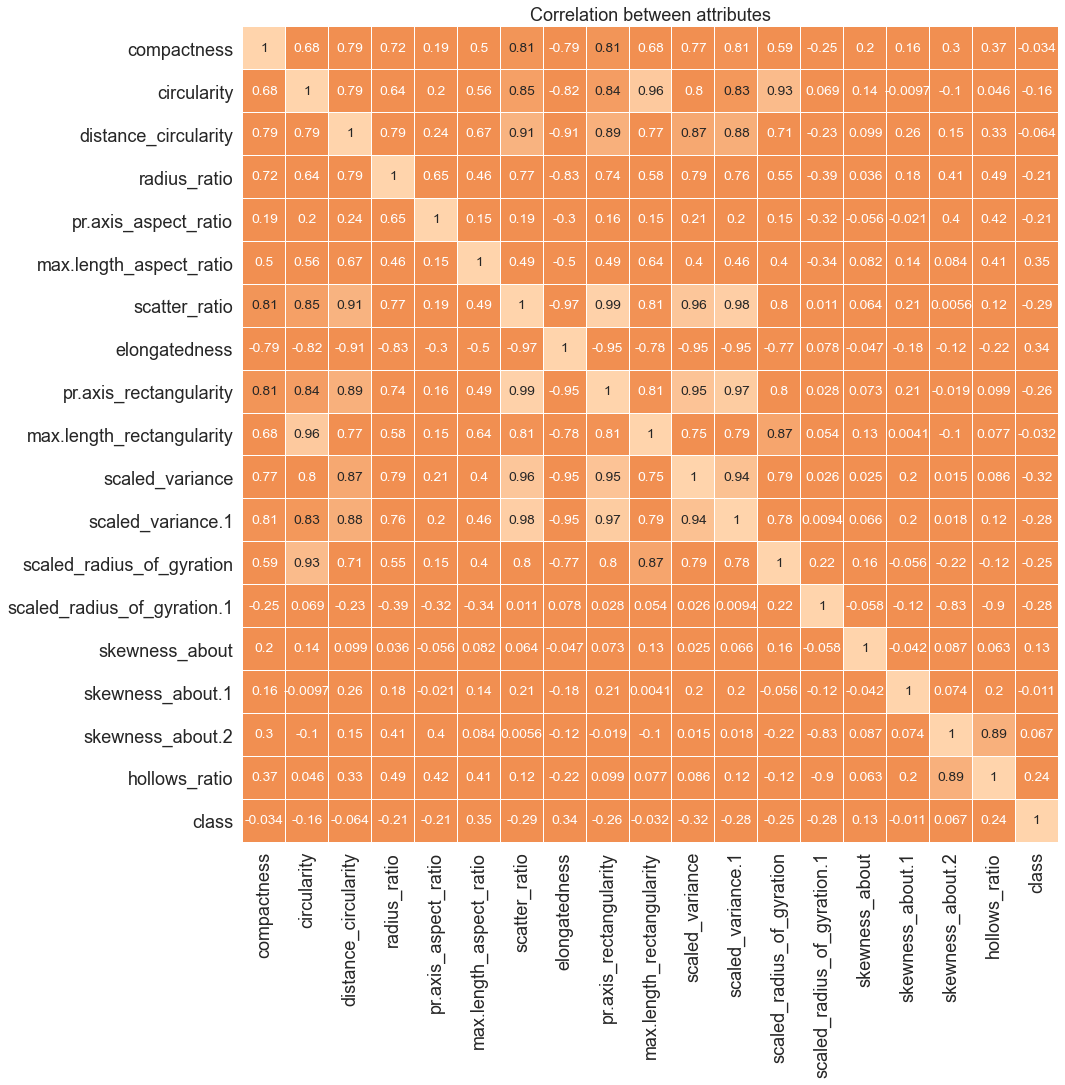

In [23]:
# correlation plot---heatmap
sns.set(font_scale=1.15)
fig,ax=plt.subplots(figsize=(18,15))
sns.heatmap(cor,vmin=0.8, annot=True,linewidths=0.01,center=0,linecolor="white",cbar=False,square=True)
plt.title('Correlation between attributes',fontsize=18)
ax.tick_params(labelsize=18)

* It shows that there are some attributes which are highly correlated as there corelation value is very high.
* For example: compactness is highly correlated in a positive way with scatter_ratio, pr.axis_rectangularity, scaled_variance1, distance_circularity, scaled_variance, radius_ratio.
* Compactness is highly correlated in a negative way with elongatedness. 

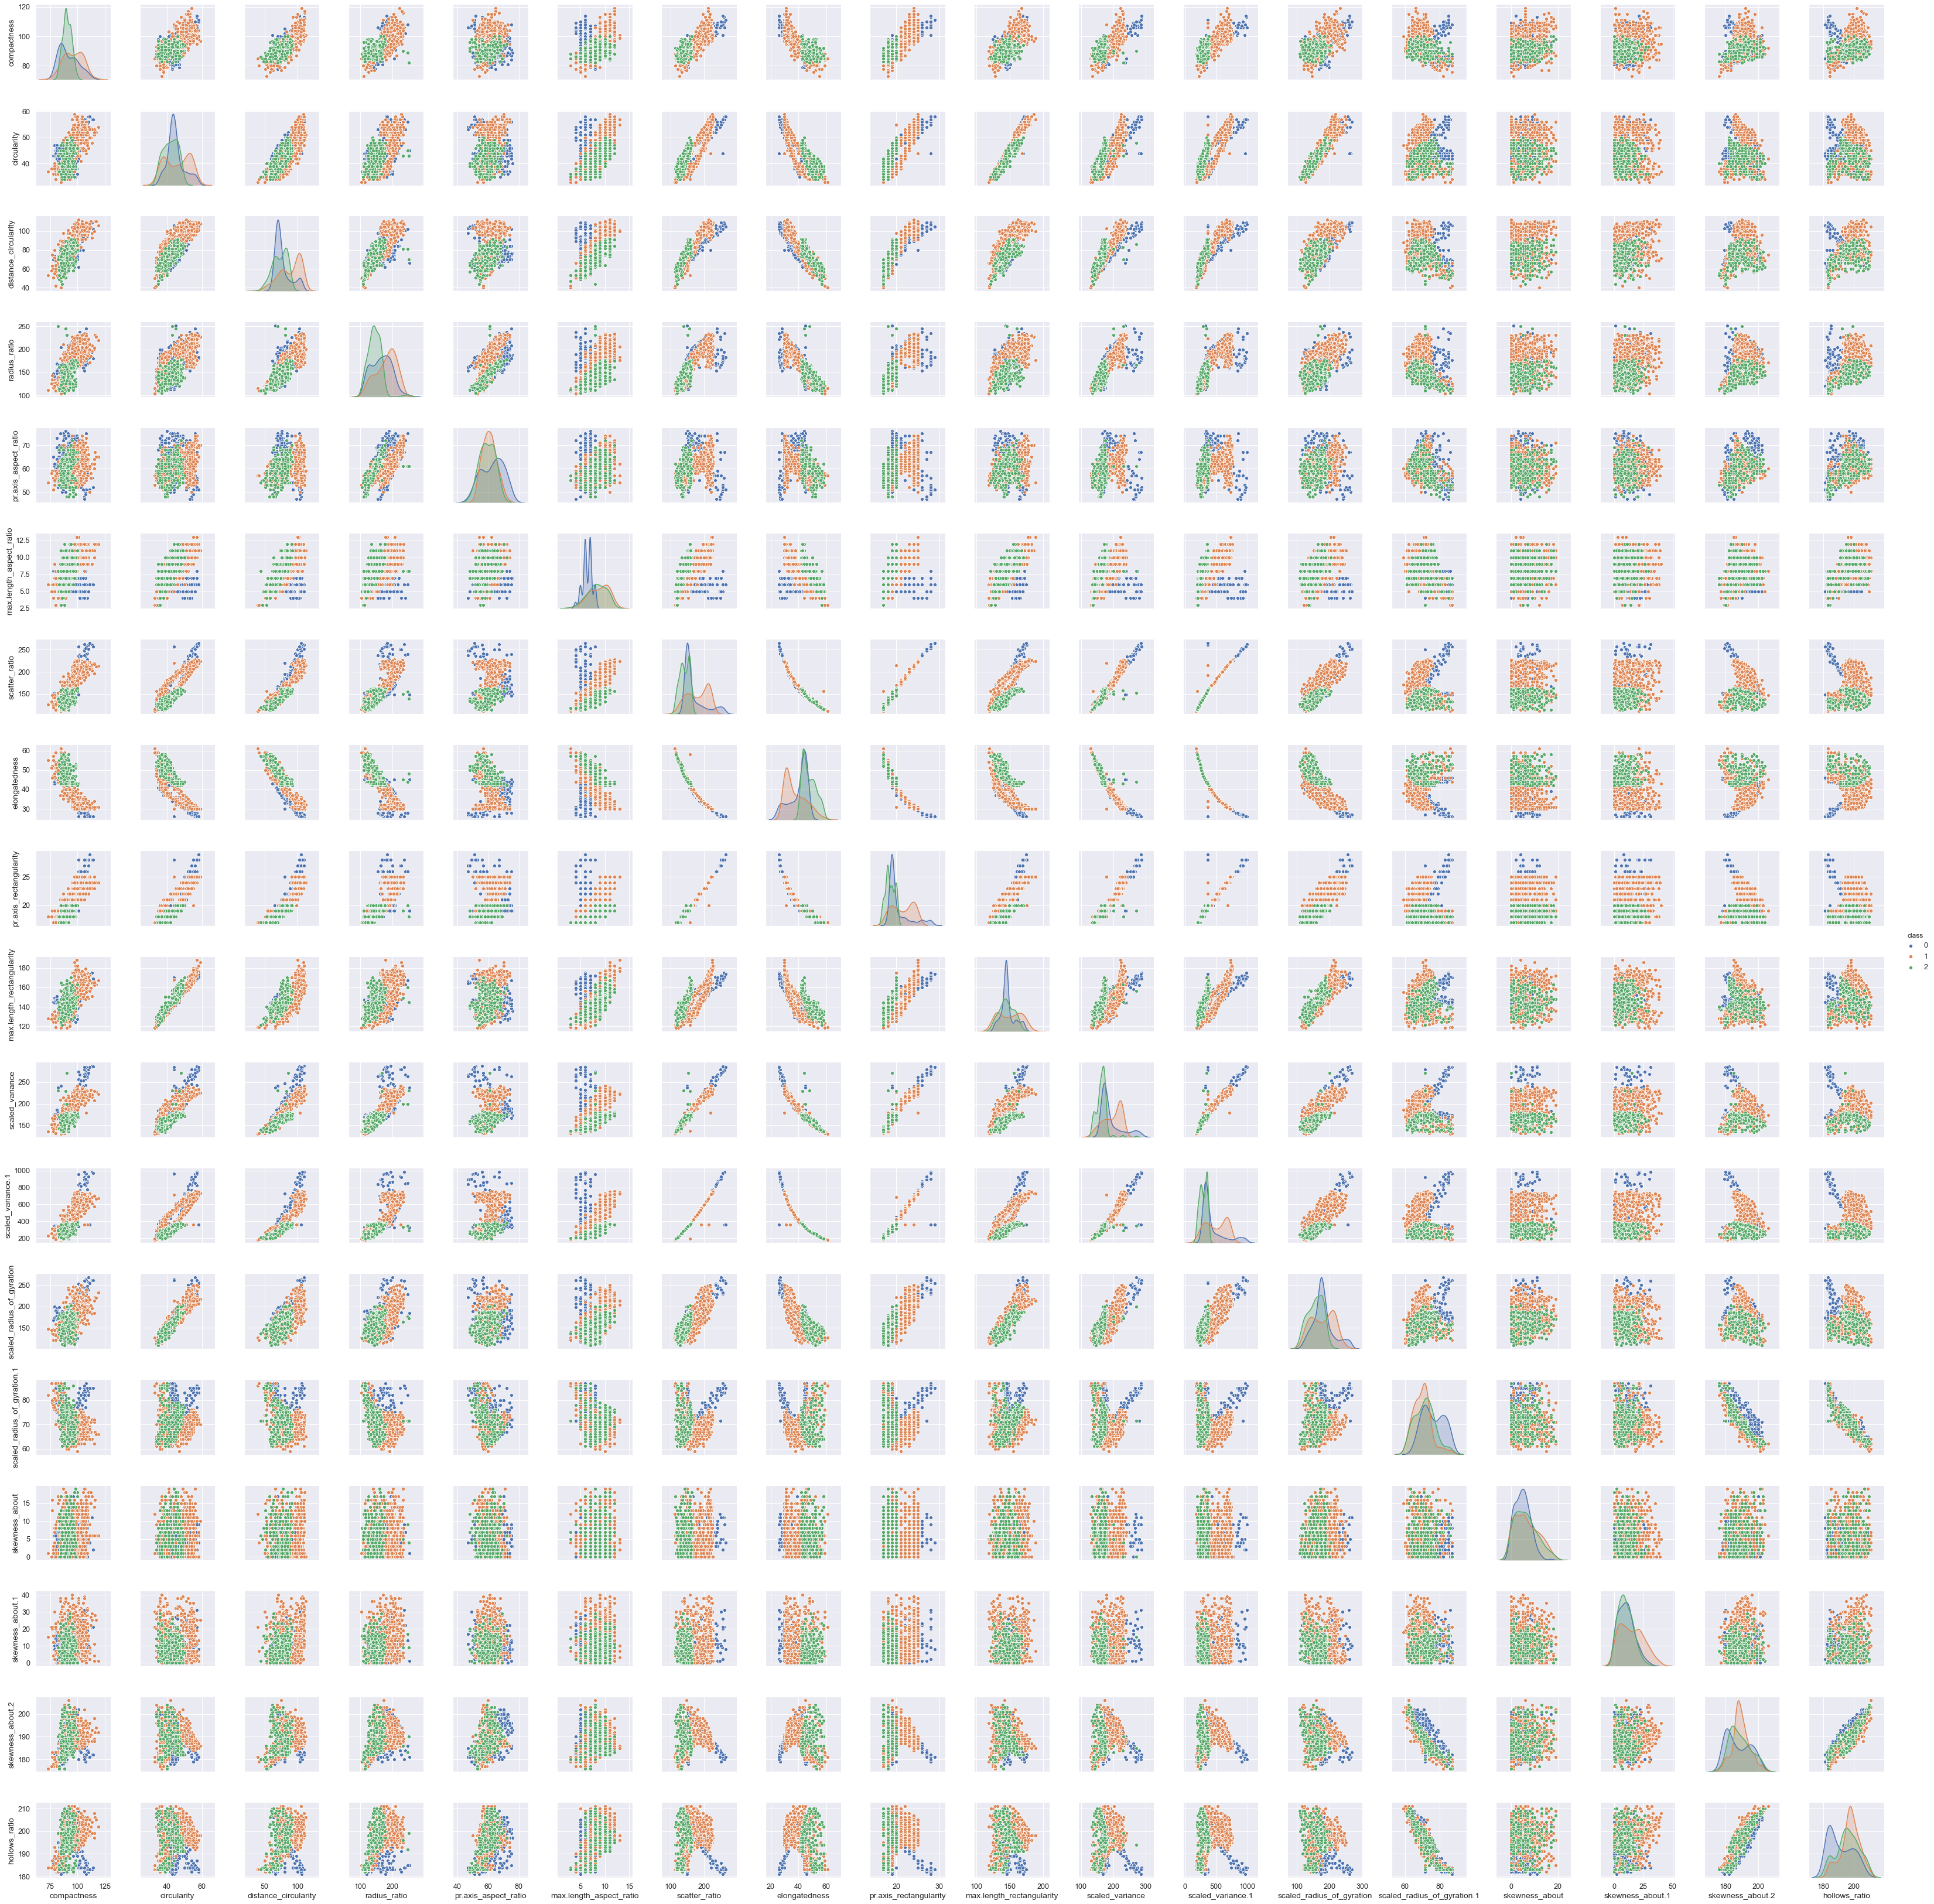

In [24]:
#pairplot
sns.pairplot(raw_data,hue='class')

* It is also showing the same information as correlation matrix.

* Compactness has positive linear relationship with circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance1, scaled_variance. compactness has negative linear relationship with elongatedness.

* Circularity has positive linear relationship with distance_circularity, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration. circularity has negative linear relationship with elongatedness.

* Distance_circularity has positive linear relationship with radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration. distance_circularity has negative linear relationship with elongatedness.

* Radius_ratio has positive linear relationship with pr.axis_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance1, scaled_radius_of_gyration. radius_ratio has negative linear relationship with elongatedness.

In [25]:
#DROPPING COLS HAVING HIGH VIF AND HIGH CORRELATION FOR FURTHER ANALYSIS
raw_data.drop(['hollows_ratio', 'scatter_ratio' ,'pr.axis_rectangularity','skewness_about.2'] ,axis=1,inplace=True )

# Without applying the dimensionality reduction, we will proceed with the process.

## Splitting the data into independent and dependent attributes

In [26]:
#independent and dependent variables
X=raw_data.iloc[:,0:14]
y = raw_data.iloc[:,14]

### Scaling the data

In [27]:
# Scaling the independent attributes using zscore
X_z=X.apply(zscore)

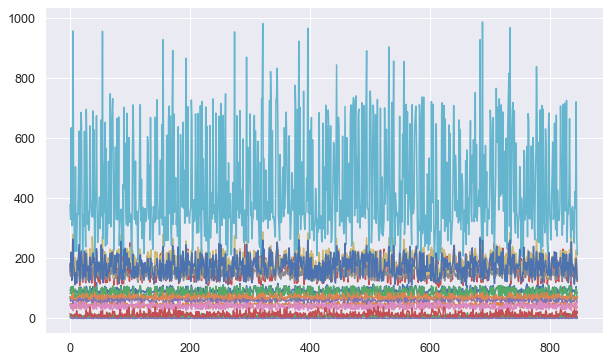

In [28]:
# prior to scaling

plt.rcParams['figure.figsize']=(10,6)
plt.plot(raw_data)
plt.show()

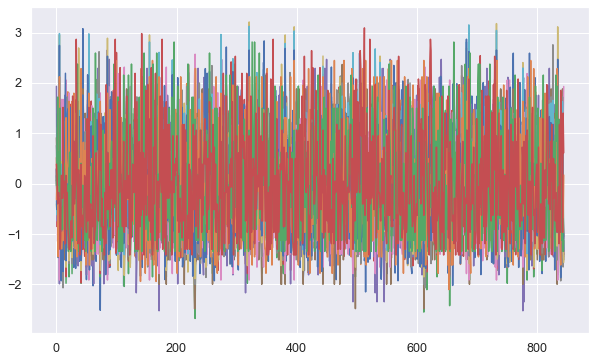

In [29]:
#plt.plot(X_z,figsize=(20,10))
plt.rcParams['figure.figsize']=(10,6)
plt.plot(X_z)
plt.show()

* We can see that the scaling has brought down the axis substantially and has brought every attribute on the same scale.

### Splitting the data

In [68]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_z,y, test_size = 0.3, random_state = 30)

### Model Building

### Logistic Regression

In [69]:
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [70]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ',model.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.9307432432432432
Accuracy on Testing data:  0.9330708661417323
Recall value:  0.9274544854769458
Precision value:  0.9394353369763205
Confusion Matrix:
 [[ 58   3   0]
 [  8 121   3]
 [  0   3  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        61
           1       0.95      0.92      0.93       132
           2       0.95      0.95      0.95        61

    accuracy                           0.93       254
   macro avg       0.93      0.94      0.93       254
weighted avg       0.93      0.93      0.93       254



* The accuracy, recall, and precision values using Logistic Regression model is high without applying dimentionality reduction (PCA).

In [71]:
resultsDf=pd.DataFrame({'Model':['Logistic'],'Accuracy': model.score(X_test , y_test)},index={'1'})
resultsDf=resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1  Logistic  0.933071

### Naive Bayes 

In [72]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [73]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', model.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.652027027027027
Accuracy on Testing data:  0.6889763779527559
Recall value:  0.6899379753387755
Precision value:  0.7606775443621286
Confusion Matrix:
 [[26  2  0]
 [11 90  2]
 [29 35 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.93      0.55        28
           1       0.71      0.87      0.78       103
           2       0.97      0.48      0.64       123

    accuracy                           0.69       254
   macro avg       0.69      0.76      0.66       254
weighted avg       0.80      0.69      0.69       254



In [74]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['Naive Bayes'], 'Accuracy': model.score(X_test, y_test)},index={'2'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1     Logistic  0.933071
2  Naive Bayes  0.688976

### Support Vector Classifier

In [75]:
clf = SVC()
clf.fit(X_train, y_train)
prediction = model.predict(X_test)

In [76]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', model.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.652027027027027
Accuracy on Testing data:  0.6889763779527559
Recall value:  0.6899379753387755
Precision value:  0.7606775443621286
Confusion Matrix:
 [[26  2  0]
 [11 90  2]
 [29 35 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.93      0.55        28
           1       0.71      0.87      0.78       103
           2       0.97      0.48      0.64       123

    accuracy                           0.69       254
   macro avg       0.69      0.76      0.66       254
weighted avg       0.80      0.69      0.69       254



In [77]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['SVC'], 'Accuracy': model.score(X_test, y_test)},index={'3'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1     Logistic  0.933071
2  Naive Bayes  0.688976
3          SVC  0.688976

### SVM K-Fold

In [78]:
from sklearn import svm
model=svm.SVC(gamma=0.025,C=3,probability=True)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
Acc_Score = model.score(X_test,y_test)
print("Test accuracy is",model.score(X_test,y_test))
print("Train accuracy is",model.score(X_train,y_train))

Test accuracy is 0.9330708661417323
Train accuracy is 0.9611486486486487


In [79]:
model = SVC(gamma=0.025,C=3,probability=True)
scores = cross_val_score(model, X_train, y_train, cv=10)
print(scores)
print('Cross Validation Score :', np.mean(scores))

[0.93333333 0.96666667 0.93220339 0.91525424 0.98305085 0.96610169
 0.94915254 0.94915254 0.88135593 1.        ]
Cross Validation Score : 0.9476271186440679


In [80]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['SVM k fold'], 'Accuracy': Acc_Score},index={'4'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1     Logistic  0.933071
2  Naive Bayes  0.688976
3          SVC  0.688976
4   SVM k fold  0.933071

* Without applying PCA, we can see that Logistic Regression and SVM K-Fold are performing the best in all the models.

# Applying the Dimensionality Reduction with PCA

### Covariance 

In [81]:
# Calculating the covariance between attributes after scaling
cov_matrix = np.cov(X_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
  -0.78968322  0.67694334  0.77078163  0.80712401  0.58593517 -0.24697246
   0.19754181  0.1565327 ]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
  -0.82244387  0.96245572  0.80371846  0.82844154  0.92691166  0.06882659
   0.13651201 -0.00967793]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
  -0.9123854   0.77544391  0.87061349  0.88498924  0.70660663 -0.22962442
   0.09922417  0.26265581]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
  -0.82636872  0.58015378  0.78711387  0.76115704  0.55142559 -0.39092105
   0.03579728  0.17981316]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00118343  0.15047265
  -0.29849719  0.14776643  0.20734569  0.19663295  0.14876723 -0.32144977
  -0.05609621 -0.02111342]
 [ 0.50051942  0.5611334   0.66759792  0.46450748  0.15047265  1.00118343
  -0.50477756  0.64347365  0.4

* Covariance tells about information contained in the mathematical space between the independent attributes.

### Eigenvalues and Eigenvectors

In [82]:
#Finding eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.30109837 -0.08495388  0.16133278 -0.02759712  0.09758677 -0.4066956
   0.28558684 -0.74016237  0.23843973 -0.07319345 -0.02478088 -0.08900119
  -0.01599195  0.00250132]
 [ 0.32580008  0.20575533 -0.00392327  0.13096903 -0.11639057  0.16571548
  -0.3165579  -0.16804311 -0.17592736  0.00659126 -0.11158802 -0.01116648
  -0.33082438  0.71545773]
 [ 0.33649702 -0.0858984   0.0860325  -0.11460158 -0.06411757 -0.05557968
   0.07009658  0.32683193  0.15529966 -0.64419897 -0.51320809  0.19088521
  -0.00333376 -0.03133994]
 [ 0.30009516 -0.32091276 -0.18468087  0.09120907  0.18139342 -0.02819622
   0.03793063  0.10950719  0.04287569  0.54838927 -0.28844398  0.31289435
  -0.43164921 -0.2177376 ]
 [ 0.11345942 -0.43657942 -0.43045175  0.38784968  0.2397271   0.46809729
   0.14858554 -0.15588646 -0.00582216 -0.24714214  0.10039362 -0.08235497
   0.23052339  0.08204571]
 [ 0.22349559 -0.16188978  0.33508143  0.03576454 -0.61252338  0.32434871
   0.4473768   0.12574116  0.17215

In [83]:
# Make a set of (eigenvalue, eigenvector) pairs

eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:]

[(7.8284900295837065,
  array([ 0.30109837,  0.32580008,  0.33649702,  0.30009516,  0.11345942,
          0.22349559, -0.34180002,  0.31596628,  0.3315182 ,  0.33716584,
          0.29923527, -0.04414854,  0.04346697,  0.05878889])),
 (1.751161016202083,
  array([-0.08495388,  0.20575533, -0.0858984 , -0.32091276, -0.43657942,
         -0.16188978,  0.0013443 ,  0.20192809,  0.07670352,  0.07783109,
          0.31161038,  0.64101349,  0.07943895, -0.23716328])),
 (1.1326263971012105,
  array([-0.02759712,  0.13096903, -0.11460158,  0.09120907,  0.38784968,
          0.03576454,  0.0843919 ,  0.10966803, -0.15054651, -0.14077052,
          0.13621152, -0.13538745,  0.34321984, -0.76981398])),
 (1.1137798178612681,
  array([ 0.16133278, -0.00392327,  0.0860325 , -0.18468087, -0.43045175,
          0.33508143,  0.10106592,  0.07025601, -0.13668723, -0.06623589,
         -0.0628548 , -0.26001055,  0.70524571,  0.16652601])),
 (0.8393265466112683,
  array([ 0.09758677, -0.11639057, -0.06411

In [84]:
# print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigenvalues)

Eigenvalues in descending order: 
[7.82849003 1.75116102 1.11377982 1.1326264  0.83932655 0.56347379
 0.26172858 0.2207335  0.08344918 0.07221832 0.05767953 0.04035737
 0.0307034  0.02084057]


### Finding variance and cummulative variance by each Eigenvector

Cumulative Variance Explained [ 55.85168925  68.34519701  76.42582269  84.37198907  90.36009218
  94.38014749  96.24742757  97.82223178  98.41759278  98.9328282
  99.34433781  99.63226399  99.85131475 100.        ]


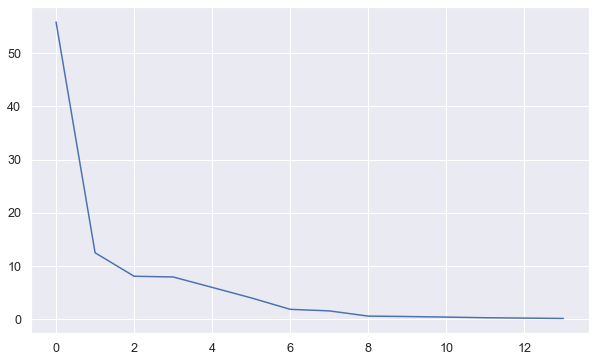

In [85]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
plt.plot(var_exp)

* We observed that there a is steep drop in variance explained with increase in number of the Principal Components.
* Also, top 7 principal components contribute more than 95% variance (information). So, we can proceed further with 7 components.

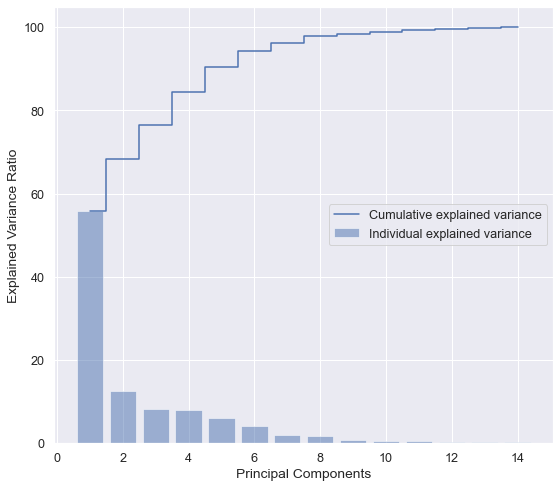

In [86]:
# Ploting 
plt.figure(figsize=(8 , 7))
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

* Here also we can visualize and eliminiate last 7 principal components because more than 95% of the data is captured by 7 principal components.

In [87]:
# Reducing from 14 to 7 dimension space
pca = PCA(n_components=7)
data_reduced = pca.fit_transform(X_z)
data_reduced.transpose()

array([[-8.17097991e-01,  1.31417999e+00, -3.66594561e+00, ...,
        -4.53697026e+00,  3.01174401e+00,  4.48877336e+00],
       [-1.11166438e+00,  1.10466231e-01,  9.26731356e-02, ...,
        -4.33392402e-01, -1.44240383e+00,  1.79195717e-02],
       [-8.41735925e-01,  2.34911623e-01, -1.10225966e+00, ...,
        -9.46149009e-01,  1.74112990e+00,  1.28566301e+00],
       ...,
       [-3.63908754e-01, -3.14507606e-01,  9.97939965e-01, ...,
        -1.24067890e+00, -4.72429019e-01, -2.08404428e-01],
       [-1.62842289e+00, -1.41451209e-01, -1.77653387e-01, ...,
         2.34235075e-01,  1.10536557e-01,  3.04817392e-01],
       [-1.26704310e-03, -3.22841169e-01, -6.48954111e-01, ...,
        -7.48111583e-01,  6.66455012e-01,  4.78205916e-01]])

In [88]:
pca.components_

array([[-0.30109837, -0.32580008, -0.33649702, -0.30009516, -0.11345942,
        -0.22349559,  0.34180002, -0.31596628, -0.3315182 , -0.33716584,
        -0.29923527,  0.04414854, -0.04346697, -0.05878889],
       [-0.08495388,  0.20575533, -0.0858984 , -0.32091276, -0.43657942,
        -0.16188978,  0.0013443 ,  0.20192809,  0.07670352,  0.07783109,
         0.31161038,  0.64101349,  0.07943895, -0.23716328],
       [ 0.02759712, -0.13096903,  0.11460158, -0.09120907, -0.38784968,
        -0.03576454, -0.0843919 , -0.10966803,  0.15054651,  0.14077052,
        -0.13621152,  0.13538745, -0.34321984,  0.76981398],
       [ 0.16133278, -0.00392327,  0.0860325 , -0.18468087, -0.43045175,
         0.33508143,  0.10106592,  0.07025601, -0.13668723, -0.06623589,
        -0.0628548 , -0.26001055,  0.70524571,  0.16652601],
       [ 0.09758677, -0.11639057, -0.06411757,  0.18139342,  0.2397271 ,
        -0.61252338, -0.09095986, -0.23544751,  0.15803581,  0.11618531,
         0.02457022,  0.18

In [89]:
X_comp = pd.DataFrame(pca.components_,columns=list(X_z))
X_comp.head().T

0         1         2         3         4
compactness                 -0.301098 -0.084954  0.027597  0.161333  0.097587
circularity                 -0.325800  0.205755 -0.130969 -0.003923 -0.116391
distance_circularity        -0.336497 -0.085898  0.114602  0.086033 -0.064118
radius_ratio                -0.300095 -0.320913 -0.091209 -0.184681  0.181393
pr.axis_aspect_ratio        -0.113459 -0.436579 -0.387850 -0.430452  0.239727
max.length_aspect_ratio     -0.223496 -0.161890 -0.035765  0.335081 -0.612523
elongatedness                0.341800  0.001344 -0.084392  0.101066 -0.090960
max.length_rectangularity   -0.315966  0.201928 -0.109668  0.070256 -0.235448
scaled_variance             -0.331518  0.076704  0.150547 -0.136687  0.158036
scaled_variance.1           -0.337166  0.077831  0.140771 -0.066236  0.116185
scaled_radius_of_gyration   -0.299235  0.311610 -0.136212 -0.062855  0.024570
scaled_radius_of_gyration.1  0.044149  0.641013  0.135387 -0.260011  0.184847
skewness_about              -0.043467  0.079439 -0.343220  0.705246  0.564275
skewness_about.1            -0.058789 -0.237163  0.769814  0.166526  0.227814

In [90]:
# P_reduce represents reduced mathematical space.
# Reducing from 17 to 10 dimension space
P_reduce = np.array(eigenvectors[0:7])   
# projecting original data into principal component dimensions
X_std_7D = np.dot(X_z,P_reduce.T)   
# converting array to dataframe for pairplot
Proj_data_df = pd.DataFrame(X_std_7D)  

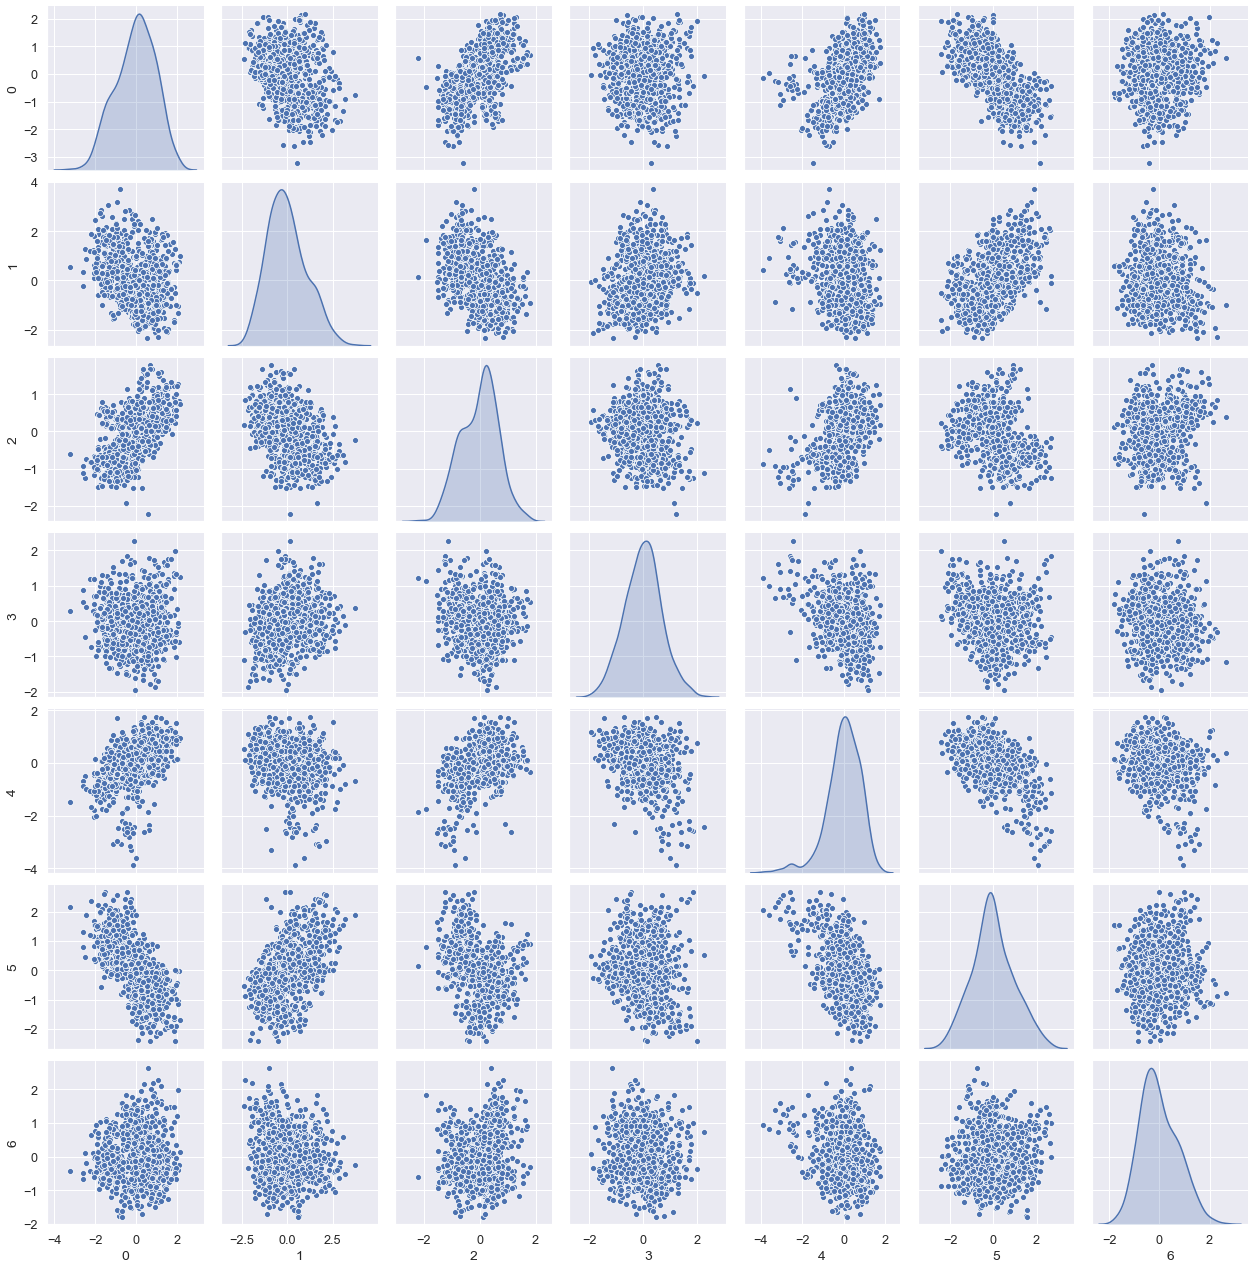

In [91]:
#Using Pairplot
sns.pairplot(Proj_data_df, diag_kind='kde') 

* Now, there are almost no correlation between independent attributes but there are some attributes which shows some correlation. 

* The reason behind this is that some attributes in data are less correlated but we still taken that for dimentionality reduction. The solution is that may be we can remove columns which are less correlated then apply PCA.

### Splitting the Data

In [92]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(Proj_data_df,y, test_size = 0.3, random_state = 30)

# Model Building

### Logistic Regression

In [93]:
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [94]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ',model.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.8530405405405406
Accuracy on Testing data:  0.8464566929133859
Recall value:  0.8174692582205166
Precision value:  0.8647140831943106
Confusion Matrix:
 [[ 47   5   3]
 [ 18 119   9]
 [  1   3  49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.85      0.78        55
           1       0.94      0.82      0.87       146
           2       0.80      0.92      0.86        53

    accuracy                           0.85       254
   macro avg       0.82      0.86      0.84       254
weighted avg       0.86      0.85      0.85       254



* The accuracy, precision and recall value is reduced after applying PCA because we have reduced the dimensions.

* Despite giving less accuracy, precision and recall, this model is better as it has taken into consideration the relationship between the independent varibales and reduced the columns which are highly correlated.


In [95]:
resultsDf=pd.DataFrame({'Model':['Logistic'],'Accuracy': model.score(X_test , y_test)},index={'1'})
resultsDf=resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1  Logistic  0.846457

### Naive Bayes Classifier

In [96]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [97]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', model.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.75
Accuracy on Testing data:  0.7992125984251969
Recall value:  0.8086336450864655
Precision value:  0.791365227264197
Confusion Matrix:
 [[54  6  4]
 [ 3 98  6]
 [ 9 23 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        64
           1       0.77      0.92      0.84       107
           2       0.84      0.61      0.71        83

    accuracy                           0.80       254
   macro avg       0.81      0.79      0.79       254
weighted avg       0.80      0.80      0.79       254



* This model is not performing well as compared to other models. 

In [98]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['Naive Bayes'], 'Accuracy': model.score(X_test, y_test)},index={'2'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1     Logistic  0.846457
2  Naive Bayes  0.799213

### Support Vector Classifier

In [99]:
clf = SVC()
clf.fit(X_train, y_train)
prediction = model.predict(X_test)

In [100]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', model.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.75
Accuracy on Testing data:  0.7992125984251969
Recall value:  0.8086336450864655
Precision value:  0.791365227264197
Confusion Matrix:
 [[54  6  4]
 [ 3 98  6]
 [ 9 23 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        64
           1       0.77      0.92      0.84       107
           2       0.84      0.61      0.71        83

    accuracy                           0.80       254
   macro avg       0.81      0.79      0.79       254
weighted avg       0.80      0.80      0.79       254



In [101]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['SVC'], 'Accuracy': model.score(X_test, y_test)},index={'3'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1     Logistic  0.846457
2  Naive Bayes  0.799213
3          SVC  0.799213

* This model is not performing well as compared to other models.

### SVM K-Fold 

In [102]:
from sklearn import svm
model=svm.SVC(gamma=0.025,C=3,probability=True)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
Acc_Score = model.score(X_test,y_test)
print("Test accuracy is",model.score(X_test,y_test))
print("Train accuracy is",model.score(X_train,y_train))

Test accuracy is 0.9173228346456693
Train accuracy is 0.9391891891891891


In [103]:
model = SVC(gamma=0.025,C=3,probability=True)
scores = cross_val_score(model, X_train, y_train, cv=10)
print(scores)
print('Cross Validation Score :', np.mean(scores))

[0.91666667 0.96666667 0.88135593 0.88135593 0.93220339 0.94915254
 0.93220339 0.91525424 0.89830508 0.94915254]
Cross Validation Score : 0.922231638418079


In [104]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['SVM K-Fold'], 'Accuracy': Acc_Score},index={'4'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1     Logistic  0.846457
2  Naive Bayes  0.799213
3          SVC  0.799213
4   SVM K-Fold  0.917323

# Final Observations :

* We can see that Logistic Regression and SVM K-fold are giving better results as compared to other models so we can use either of the two models to predict the silhouette as one of three types of vehicle. But we can prefer SVM K-Fold model for the best accuracy.


* The validation scores of SVM K-Fold has decreased from 94.76 % to 92.22 % after the PCA.


* But we have achieved these scores after dropping 7 attributes from the dataset without a drastic decrease in accuracy scores. So, we can state that PCA analysis is quite successful.